Damit fangen wir immer an ....

In [103]:
%matplotlib inline

# Grundausstattung an Bibliotheken, die wir immer laden
import numpy as np                  # Numerische Operationen, Lineare Algebra
from scipy.stats import *           # Funktionsbibliothek mit statistischen Funktionen
import matplotlib.pyplot as plt     # Visualisierung von Daten/Ergenissen
import pandas as pd                 # Bearbeitung von Tabellen (sog. Data Frames)
import seaborn as sns               # Erweiterte Visualisierung von Daten/Ergebnissen etc.
import warnings                     # Ermöglicht die Deaktivierung von best. Warnmeldungen
import random                       # Damit kann man Zufallszahlen generieren
import os                           # Ermöglicht Zugriff auf das Dateiablagesystem 

# Ein paar Einstellungen, die einem das Leben einfacher machen
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = [8, 4]
from IPython.core.pylabtools import figsize
plt.style.use('seaborn-white')
sns.set_style('white')
sns.set_context('talk')

#  Einführung Machine Learing

2. Daten & Preprocessing
   - Daten laden u. explorieren
   - Einfaches Preprocessing


3. Unsupervised Learning
   - Clustering mit Kmeans


4. Supervised Learning
   - Datenset ...
   - Lineare Regression
   - Naive Bayes
   - Logistische Regression
   - Decision Tree / Random Forest
   - Multi-Layer-Perzeptron MLP
   - Support Vector Machines SVM


5. Modellauswahl & -beurteilung
   - Bias-Variance Dilemma
   - Confusion Matrix
   - Accuracy / Precision / Recall

***
## 2. Daten & Preprocessing

### 2.1 Daten laden & explorieren
Zunächst schauen wir uns an, wie man ML Daten in Python gut einlesen, explorieren und vorbereiten kann.  
Dazu verwenden wir hauptsächlich die Funktionsbibliothek PANDAS, die wir bereits in der ersten Zelle (s.o.) dieses Notebooks installiert haben.

#### Erste Schritte
Wir laden ein Datenset mit 261 PKW Modellen, die mit jeweils 8 Merkmalen beschrieben werden.  
Die Daten sind im Urzustand noch nicht in dem Format, dass wir für ML brauchen.  
Darum kümmern wir uns jetzt ...

In [174]:
# Einlesen des Datensets (liegt als csv-Datei im lokalen Verzeichnis) in einen Pandas DataFrame (df)

os.chdir("F://Data/Data Science Uni/40200/BMW Bank Seminar/Data Sets")

cars = pd.read_csv("cars.csv", sep=",", decimal=".")     # Einlesen der.csv Datei vom Verzeichnis und in den Dataframe "cars" schreiben
# cars = cars.iloc[:,1:]
cars.head()                                              # .head()  zeigt die ersten 5 Datensätze/Zeilen des Dataframes an 

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,country
0,14.0,8,350.0,165,4209.0,12,1972,US
1,31.9,4,89.0,71,1925.0,14,1980,Europe
2,17.0,8,302.0,140,3449.0,11,1971,US
3,15.0,8,400.0,150,3761.0,10,1971,US
4,30.5,4,98.0,63,2051.0,17,1978,US


In [105]:
# Umfang unseres df bestimmen:  Anzahl Datensätze (Zeilen), Anzahl Features (Spalten)
cars.shape

(261, 8)

In [106]:
# Anzeigen der Mermale / Features / Spalten, ihrer Datentypen und Anzahl von fehlenden Werten
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
mpg            261 non-null float64
cylinders      261 non-null int64
cubicinches    259 non-null float64
hp             261 non-null int64
weightlbs      258 non-null float64
time-to-60     261 non-null int64
year           261 non-null int64
country        257 non-null object
dtypes: float64(3), int64(4), object(1)
memory usage: 16.4+ KB


In [107]:
# Mittelwerte aller Merkmale ermitteln:
cars.mean()

# funktioniert auch mit ...
# .median()
# .std()
# .var()
# .min()
# .max()


mpg              23.144828
cylinders         5.590038
cubicinches     200.918919
hp              106.360153
weightlbs      3009.833333
time-to-60       15.547893
year           1976.819923
dtype: float64

In [108]:
# Oder wenn man nur die Werte eines bestimmten Merkmals ermitteln möchte:
cars.mpg.mean()

23.144827586206898

In [109]:
# Noch einfacher ... eine komplette Beschreibung der Verteilungsparameter des Datensets
# Funktioniert aber nur für numerische Feature (hier z.B. nicht für das Merkmal "colour")
cars.describe()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
count,261.000000,261.000000,259.000000,261.000000,258.000000,261.000000,261.000000
mean,23.144828,5.590038,200.918919,106.360153,3009.833333,15.547893,1976.819923
std,7.823570,1.733310,109.258305,40.499959,854.039019,2.910625,3.637696
min,10.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,1971.000000
25%,16.900000,4.000000,99.500000,75.000000,2248.000000,14.000000,1974.000000
50%,22.000000,6.000000,156.000000,95.000000,2867.500000,16.000000,1977.000000
75%,28.800000,8.000000,303.000000,138.000000,3670.000000,17.000000,1980.000000
max,46.600000,8.000000,455.000000,230.000000,4997.000000,25.000000,1983.000000


#### Visuelle Exploration der Daten

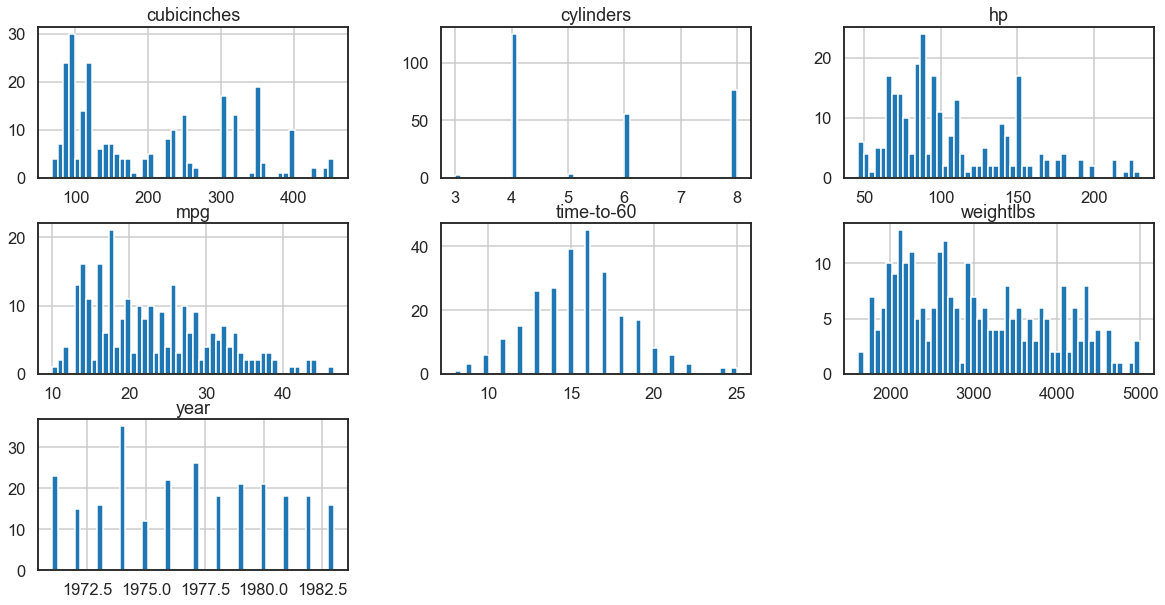

In [110]:
# Visualisierung der numerischen Daten als Histogramm
figsize(20,10)          # stellt die Größe der Abbildung ein (Horizontale, Vertikale)
_= cars.hist(bins=50,)     # erzeugt ein Histogramm mit 50er Intervallschritten, einstellbar über bins=xx

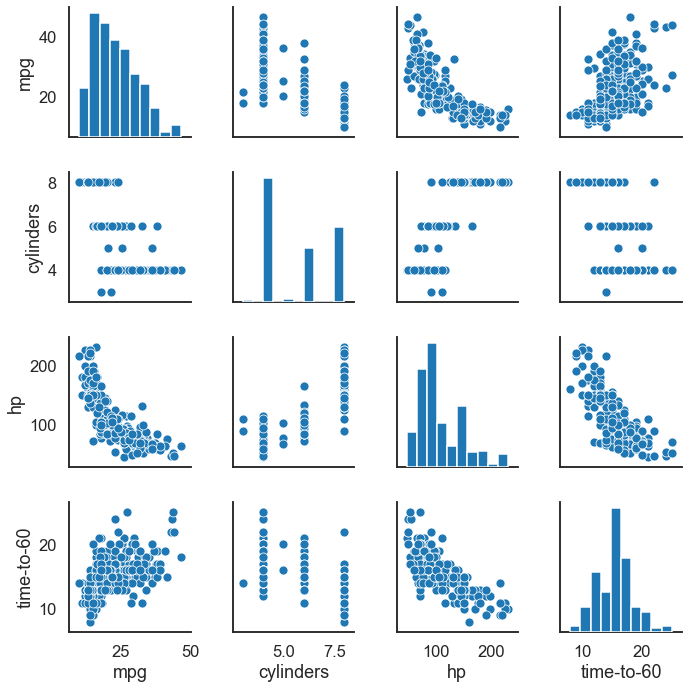

In [111]:
# Advanced Visualisierung: Zeichnet die paarweise Verteilung für ausgewählte Feature
_= sns.pairplot(cars, vars=["mpg","cylinders","hp","time-to-60"], )

### 2.2 Wichtige Preprocessing Schritte
Leider sind Rohdaten in der Realität selten (oder nie) in einem für ML Algorithmen geigneten Zustand,  
so dass ein PreProcessing und Vorbereiten der Daten erforderlich ist.
Die gängigsten Arbeitsschritte sind ...

+ Fehlende Werte ersetzen oder bereinigen
+ Kategorielle Daten encoden (umwandeln)
+ Daten standardisieren / skalieren


#### *Fehlende Werte*
... heißen in Python meistens "NA" und leider funktionieren viele ML Algorithmen nicht mit NA Werten im Datenset.  
Welche Strategien kann man anwenden:

+ Löschen von einzelnen Datensätzen mit NA Werten
+ Löschen von einzelnen Merkmalen (Feature) mit NA Werten
+ NA Werte durch Schätzwerte ersetzen => Mittelwert, Median, Modus, Max-Wert, Min-Wert, individueller Wert

In [112]:
# Welche Merkmale haben NA und wieviele davon?
cars.isna().sum()

# oder prozentual:  
# cars.isna().mean()

mpg            0
cylinders      0
cubicinches    2
hp             0
weightlbs      3
time-to-60     0
year           0
country        4
dtype: int64

In [113]:
# Da uns prozentual nur wenige Werte fehlen, können wir sie bedenkenlos mit dem jeweiligen Mittelwert oder Median des Merkmals ersetzen
cars = cars.fillna( cars.mean() )   # alternativ mit .median()

In [114]:
# Sind jetzt alle fehlenden Werte ersetzt worden?
# mtcars.isna().sum()

In [115]:
# OK, dann kümmern wir uns noch um das nicht-numerische Merkaml "country"
cars.country = cars.country.fillna("MISSING")

In [116]:
# Werfen wir nochmal einen Blick auf die Verteilung des Merkmals "country"
cars.country.value_counts()

US.        160
Japan.      50
Europe.     47
MISSING      4
Name: country, dtype: int64

#### *Kategorielle Daten umwandeln*
Sehr viele ML Algorithmen (fast alle in der Bibliothek Scikit-Learn) können nur numerische Daten verarbeiten.  
In der Praxis sind kategorielle Merkmale aber häufig alphanumerisch: Farbe, Geschlecht, Hersteller, Modell, ...  
Wenn man diese Merkmale als Feature nutzen möchte, muss man sie in eine numerische Form encoden:
  
Häufig verwendet wird das sog. "Label Encoding" und das sog. "One Hot Encoding".  

OH Encoding hat ggü. Label Encoding einen entscheidenden Vorteil: 
Label Encoding stellt eine häufig nicht real existierende Logik bzw. Rangfolge zwischen den Merkmalen her:  
Label Encoding unseres Merkmals Country führt zu: (0, US), (1, Europe), (2, Japan). Ist Japan > Europe > US ??    
Beim OH Encoding werden die Merkmale transformiert, ohne dass eine ungewollte Rangfolge der Ausprägungen ensteht:

In [117]:
# Was machen wir mit dem Feature "Colour"?
# Bevor wir es transformieren, speichern wir eine separate Kopie des Merkmals, die wir später noch benötigen
cars_target = cars.country.copy()

# Jetzt transformieren wir cars mit "One Hot Encoding"
cars = pd.get_dummies(cars, )
cars.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,country_Europe.,country_Japan.,country_MISSING,country_US.
0,14.0,8,350.0,165,4209.0,12,1972,0,0,0,1
1,31.9,4,89.0,71,1925.0,14,1980,1,0,0,0
2,17.0,8,302.0,140,3449.0,11,1971,0,0,0,1
3,15.0,8,400.0,150,3761.0,10,1971,0,0,0,1
4,30.5,4,98.0,63,2051.0,17,1978,0,0,0,1


#### Daten normalisieren/standardisieren
Sehr viele Algorithmen nutzen mathematische Distanzmaße wie z.B. den Abstand eines Datenpunktes vom Mittelwert.  
Wenn die einzelnen Feature in ihren Ausprägungen unterschiedlich stark skalieren (z.B. Anzahl Zylinder und PS)  
dann "verzerren" diese unterschiedlichen Skalen die Ergebnisse des Algorithmus.

Lösungsstrategie: Einheitliche Skalierung der Daten, d.h. man standardisiert sie.

In [91]:
# Ein Blick auf die statistischen Eckwerte (Lageparameter) unserer numerischen Feature
feat_num = ['mpg', 'cylinders', 'cubicinches', 'hp', 'weightlbs', 'time-to-60']   # Vereinfacht die Adressierung
cars.loc[:, feat_num].describe()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60
count,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,23.144828,5.590038,200.918919,106.360153,3009.833333,15.547893
std,7.823570,1.733310,108.837269,40.499959,849.097575,2.910625
min,10.000000,3.000000,68.000000,46.000000,1613.000000,8.000000
25%,16.900000,4.000000,101.000000,75.000000,2254.000000,14.000000
50%,22.000000,6.000000,156.000000,95.000000,2904.000000,16.000000
75%,28.800000,8.000000,302.000000,138.000000,3664.000000,17.000000
max,46.600000,8.000000,455.000000,230.000000,4997.000000,25.000000


Wir standardisieren unsere Daten mit der sog. Z-Score Methode (Normalisierung)  
Die Funktionsbibliothek Scikit-Learn (ML Methoden) bietet dafür eine geeignete Methode an.

In [101]:
from sklearn.preprocessing import StandardScaler
X = cars.copy()                        # jetzt wandeln wir unseren Dataframe in eine Datenmatrix X um
X = X.loc[:,feat_num]                  # wir skalieren nur die ersten 5 Feature (nicht das Jahr und die Länder)
scaler = StandardScaler().fit(X)       # Trainiert den Scaler auf die Datenmatrix
X = scaler.transform(X)                # Transformiert Datenmatrix X
print(cars.loc[:0,feat_num])           # Ausgabe der ersten Zeile des Cars Datensets
print(X[:1])                           # Ausgabe der ersten Zeile der transformierten Matrix X
print(80*"-")
for i in X[:5]: print("\n",i)          # Pretty Printing der ersten 5 transformierten Datensätze


    mpg  cylinders  cubicinches   hp  weightlbs  time-to-60
0  14.0          8        350.0  165     4209.0          12
[[-1.17112732  1.39305285  1.37239295  1.45068065  1.41499703 -1.22128734]]
--------------------------------------------------------------------------------

 [-1.17112732  1.39305285  1.37239295  1.45068065  1.41499703 -1.22128734]

 [ 1.12122635 -0.91910482 -1.03028992 -0.87476849 -1.28008557 -0.53282946]

 [-0.78693397  1.39305285  0.93052024  0.83221013  0.51820947 -1.56551627]

 [-1.04306287  1.39305285  1.83267702  1.07959834  0.88636436 -1.90974521]

 [ 0.94193612 -0.91910482 -0.94743878 -1.07267905 -1.13140763  0.49985734]


***
## 3. ML Algorithmen in Action
Bislang haben wir die Daten nur exploriert ... jetzt steigen wir richtig ins ML ein ...

### 3.1 Unsupervised Learning: Clustering mit k-Means
Wir arbeiten mit unserem cars Datenset weiter.  
Wir unterstellen die Herkunftsregion "country" wäre uns nicht bekannt ...  
und versuchen diese jetzt fehlende Information über k-Means zu finden:

In [120]:
cars.loc[:,feat_num].sample(5)

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60
251,24.0,4,121.0,110,2660.0,14
174,21.0,4,122.0,86,2226.0,17
83,23.0,4,115.0,95,2694.0,15
25,33.0,4,91.0,53,1795.0,17
148,15.0,8,350.0,165,3693.0,12


Jetzt wenden wir den K-Means Algorithmus an, um die Daten zu clustern

In [121]:
from sklearn.cluster import KMeans    # zunächst muss der Algorithmus importiert werden

X = cars.loc[:,feat_num].copy()       # Datenmatrix X mit unseren Features

# scaler = StandardScaler().fit(X)       # Trainiert den Scaler auf die Datenmatrix
# X = scaler.transform(X)  

km = KMeans(n_clusters=3).fit(X)      # Wendet k-Means auf X an, mit Vorgabe 3 Cluster

Mal sehen wie gut k-Means funktioniert auf diesem Datenset.  
In der Realität würden wir natürlich die "richtigen" Zuordnungen nicht kennen ...

In [127]:
print("Gruppierung durch k-Means Algo:\n", pd.Series(km.labels_).value_counts())
print()
print("Reale Zuordnung im Datenset\n", cars_target.value_counts())
# km.labels_  

Gruppierung durch k-Means Algo:
 1    127
2     73
0     61
dtype: int64

Reale Zuordnung im Datenset
 US.        160
Japan.      50
Europe.     47
MISSING      4
Name: country, dtype: int64


Wir visualisieren die k-Means Ergebnisse zum besseren Verständnis

In [136]:
list(enumerate(cars.columns[:6]))

[(0, 'mpg'),
 (1, 'cylinders'),
 (2, 'cubicinches'),
 (3, 'hp'),
 (4, 'weightlbs'),
 (5, 'time-to-60')]

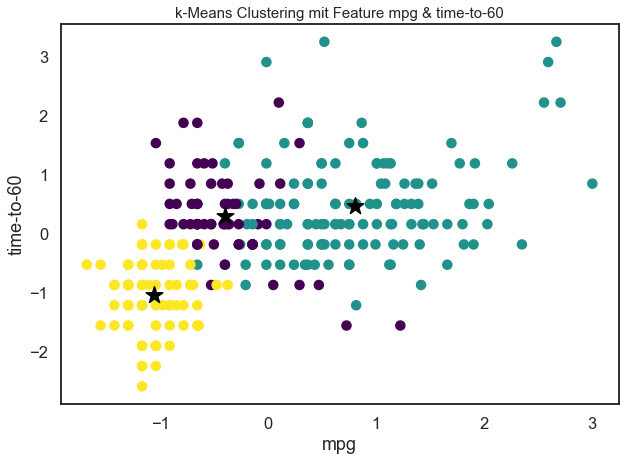

In [172]:
# Visualisierung der Zuordnungen
figsize(10,7)

# Hier können wir die Merkmale für das Plotting auswählen
i,j = 0,5 

plt.scatter(X[:,i], X[:,j], c=km.labels_, cmap="viridis")
plt.scatter(km.cluster_centers_[:,i], km.cluster_centers_[:,j], c='k', marker='*', s=300, ) # Scatterplot mit Centroids
plt.title(f"k-Means Clustering mit Feature {cars.columns[i]} & {cars.columns[j]}", fontsize=15)
plt.xlabel(cars.columns[i]); plt.ylabel(cars.columns[j]); 
plt.show()

Wenn wir mit der Qualität unseres Modells zufrieden wären (ohne Kenntnis der Echtdaten schwierig!).  
Könnten wir es nun verwenden, um weitere NEUE Datensätze zu beurteilen:

In [173]:
pkw_new = [
    [31.4,4,85,65,2500,19,],
    [16,8,304,150,4200,12,],
    [24,4,113,95,2000,16,],
    [24,4,107,90,2750,15,],
    [37.2,4,86,65,2019,16,],
    [21.5,4,121,110,2600,13,]] 

# Unser trainiertes Modell erwartet natürlich skalierte Daten!
pkw_new_trafo = scaler.transform(pkw_new)

km.predict(pkw_new_trafo)

array([1, 2, 1, 1, 1, 1])

### 3.2 Supervised Learning: Lineare Regression
Das Boston Housing Dataset basiert auf U.S. Cencus Daten und beschreibt anhand von 14 Merkmalen 506 Bezirken der Boston Metropolitan Area.  
Uns interessiert vor allem der durchschnittliche Preis eines eigentümerbewohnten Hauses in 1.000 USD.  
Das entsprechende Feature in unserem Datensatz ist "MEDV" (das ist unser y).
Welche unabhängigen Variablen (Prediktoren) liefern welchen Beitrag zur Erklärung des MEDV?

In [ ]:
from sklearn.datasets import load_boston

boston = load_boston()
df = pd.DataFrame(boston.data, columns = boston.feature_names)
df["MEDV"] = boston.target

print(df.shape)
df.sample(5)

Wir erstellen uns eine Datenmatrix X (ohne MEDV) und einen Target-Vektor y (MEDV).  
Dann trainieren wir ein lineares Regressionsmodell auf X und y.

In [ ]:
from sklearn.linear_model import LinearRegression
X,y = load_boston(return_X_y=True)

lr = LinearRegression().fit(X,y)
score = lr.score(X,y)

print(f"Anteil der erklärbaren Varianz, R² = {score:.2f}")
print()
for i in enumerate(zip(df.columns,lr.coef_)): print(i)

In [ ]:
# Betrachtung der einzelnen Variablen im Zusammenhang mit MEDV
# Entspricht der univariaten Regression
for i in range(len(df.columns)-1):
# for i in range(6):        # wir nehmen nur die ersten 5 Variablen
    
    figsize(6,2)
    X = df.iloc[:,i].values[:,np.newaxis]
    y = df.iloc[:,-1].values[:,np.newaxis]
    lr2 = LinearRegression().fit(X,y)
    plt.scatter(X, y, color='b', s=1)
    plt.plot(X, lr2.predict(X), color='g', lw=2)
    plt.title(f"Zusammenhang MEDV und {df.columns.to_list()[i]}: R² = {lr2.score(X,y):.2f}", fontsize=12)
    plt.show()

### 3.3 Supervised Learning: Classification

#### 3.3.1 Naive Bayes

#### Home Credit Default Risk Competition

In [ ]:
os.chdir("F://Data/Data Science Uni/40200/BMW Bank Seminar/Data Sets")
os.listdir()

In [ ]:
for i in obj_cols:
    anz = hc[i].nunique()
    print(i, anz)

In [ ]:
# Rausfinden, wieviele NA-Werte jede Spalte enthält ...
na_cols_v = [(X[col].isna().mean().round(4), col) for col in X.columns if float(X[col].isna().sum()) > 0.0]
sorted(na_cols_v, reverse=True)

In [ ]:
hc = pd.read_csv("home_credit_small.csv")
X = hc.drop("TARGET", axis=1)
y = hc.TARGET
print(X.shape, y.shape, hc.shape)
print(hc.TARGET.value_counts(normalize=True))

obj_cols = [col for col in X if X.loc[:,col].dtype == "object"]
X = X.drop(obj_cols, axis=1)
na_cols = [col for col in X.columns if float(X[col].isna().sum()) > 0.0] # Liste mit allen Spalten, die NA enthalten
X = X.drop(na_cols, axis=1)
print(X.shape)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, stratify=y, random_state=42)
print(f' Trainingsset: {X_train.shape, y_train.shape} / Test Set: {X_test.shape, y_test.shape}')

In [ ]:
# %%timeit
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# clf1 = GaussianNB().fit(X_train, y_train)
clf1 = SVC(class_weight="balanced").fit(X_train, y_train)
t_names = ["No Default", "Default"]
y_true = y_test
y_pred = clf1.predict(X_test)


In [ ]:
print(classification_report(y_true, y_pred, target_names=t_names))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred, target_names=t_names))

#### 3.3.2 Logistische Regression

#### 3.3.3 Decision Tree / Random Forest

#### 3.3.4 Neuronales Netz: MLP Multi-Layer-Perzeptron

***
## 4. Evaluation und Auswahl von Modellen 

# Parkplatz

In [ ]:
## Home Credit Datenset verkleinern auf 30k Datensätze (10%)
hc = pd.read_csv("application_train.csv") 
X = hc.iloc[:,2:].copy()
y = hc.iloc[:,1].copy()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, shuffle=True, stratify=y, random_state=42)

print(f' Trainingsset: {X_train.shape, y_train.shape}  / Test Set: {X_test.shape, y_test.shape}')
print(y_train.value_counts(normalize=True))

X_train.index.name = "idx"
y_train.index.name = "idx"
X2 = X_train.merge(y_train, on="idx")
X2.shape


In [ ]:
X2.to_csv("home_credit_small.csv")

In [ ]:
mtcars = pd.read_csv("mtcars.csv", index_col=0, sep=";", decimal=",")
mtcars = mtcars.fillna(mtcars.mean())
mtcars.colour = mtcars.colour.fillna("MISSING")

In [ ]:
# Standardize data (0 mean, 1 stdev)
from sklearn.preprocessing import StandardScaler
import pandas
import numpy
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'klass']
dataframe = pandas.read_csv(url, names=names, )
dataframe.index.name="idx"
array = dataframe.values
print(dataframe.shape)
# separate array into input and output components
X = array[:,0:8]
Y = array[:,8]
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)
# summarize transformed data
numpy.set_printoptions(precision=3)
print(rescaledX[0:5,:])

df = pd.DataFrame(rescaledX, columns=names[:8])
df.index.name="idx"
df = df.merge(dataframe.klass, on="idx" )
print(df.shape)
df


In [ ]:
dataframe.klass

Variablen im Boston Housing Dataset:
+ CRIM - per capita crime rate by town
+ ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
+ INDUS - proportion of non-retail business acres per town.
+ CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
+ NOX - nitric oxides concentration (parts per 10 million)
+ RM - average number of rooms per dwelling
+ AGE - proportion of owner-occupied units built prior to 1940
+ DIS - weighted distances to five Boston employment centres
+ RAD - index of accessibility to radial highways
+ TAX - full-value property-tax rate per USD 10,000
+ PTRATIO - pupil-teacher ratio by town
+ B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
+ LSTAT - % lower status of the population
+ MEDV - Median value of owner-occupied homes in USD 1000's

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test_total, y_train, y_test_total = train_test_split(X, y, test_size=0.4, shuffle=True, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test_total, y_test_total, test_size=0.5, shuffle=True, stratify=y_test_total, random_state=42)
print(f' Trainingsset: {X_train.shape, y_train.shape} / Validation Set: {X_val.shape, y_val.shape}  / Test Set: {X_test.shape, y_test.shape}')

In [ ]:
# Confusion Matix plotten
def Plot_confMatrix(y_real, y_pred, title='Titel'):
    '''
    Erstellen einer Confusion Matrix Grafik
    im Abgleich von Label y_real und Prognose y_pred
    '''
    from sklearn.metrics import confusion_matrix
    mat = confusion_matrix(y_real, y_pred)
    sns.set(font_scale=1.4)
    sns.heatmap(mat, square=True, annot=True, fmt='d',  cmap='Blues', cbar=True, )
    plt.xlabel('Prediction')
    plt.ylabel('True value')
    plt.title(title);
    return plt.show()   

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
## Home Credit Datenset verkleinern auf 30k Datensätze (10%)
hc = pd.read_csv("application_train.csv") 
X = hc.iloc[:,2:].copy()
y = hc.iloc[:,1].copy()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, shuffle=True, stratify=y, random_state=42)

print(f' Trainingsset: {X_train.shape, y_train.shape}  / Test Set: {X_test.shape, y_test.shape}')
print(y_train.value_counts(normalize=True))

X.index.name = "idx"
y.index.name = "idx"
X2 = X.merge(y, on="idx")



In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

model = 'Baseline Decision Tree'
t_names = ['Manuelle Entscheidung', 'Systementscheidung']

estimator = DecisionTreeClassifier(max_depth=5)
estimator.fit(X_train, y_train)

ytrue = y_val
ypred = estimator.predict(X_val)
ppred = estimator.predict_proba(X_val)
ppred_1 = ppred[:, 1]
ppred_0 = ppred[:, 0]

accuracy = accuracy_score(ytrue, ypred)
roc_auc = roc_auc_score(ytrue, ppred_1)
print(f'Accuracy Score: {accuracy:.4f}, AUC: {roc_auc:.4f}')
print(classification_report(ytrue, ypred, target_names=t_names))

# Feature Importance aus Model in Dataframe FI schreiben
fi_data = {'Feature': list(X_train.columns), 'F_Importance': estimator.feature_importances_}
FI = pd.DataFrame(data=fi_data)
FI = FI.sort_values('F_Importance', ascending=False)[:15]
FI

In [ ]:
os.chdir("F://Data/Data Science Uni/40200/BMW Bank Seminar/Data Sets")
os.listdir()

In [ ]:
cars.columns

In [ ]:
cols = [c.strip() for c in cars.columns]

In [ ]:
cars.info()

In [ ]:
cars.describe()

In [ ]:
os.chdir("F://Data/Data Science Uni/40200/BMW Bank Seminar/Data Sets")
os.listdir()

cars = pd.read_csv("cars.csv", sep=",", decimal=".")

# Leerstellen in Bezeichnungen entfernen und falsche Datentypen korrigieren
cols = [c.strip() for c in cars.columns]
cars.columns = cols
cars.country = cars.country.str.strip()
cars.cubicinches = cars.cubicinches.str.strip()
cars.weightlbs = cars.weightlbs.str.strip()
cars.cubicinches = pd.to_numeric(cars.cubicinches)
cars.weightlbs = pd.to_numeric(cars.weightlbs)

# Spalten mit NA-Werten identifizieren und mit Mittelwert imputieren
cols_nan = [c for c in cars.columns if any(cars[c].isna())]
cars[cols_nan] = cars[cols_nan].fillna(cars[cols_nan].mean())

# Neue Spalte "country_code": Country (Datentyp Text) in numerisches Format encoden
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cars["country_code"] = pd.Series(le.fit_transform(cars.country))

print(list(enumerate(le.classes_)))
cars.head()


In [ ]:
sns.pairplot(cars, size=2)

In [ ]:

# k-Means Algorithmus anwenden
from sklearn.cluster import KMeans

X = cars.drop(["country", "country_code"], axis=1)
y = cars.country_code

km = KMeans(n_clusters=3).fit(X)           # Wendet k-Means auf X an, mit Vorgabe 3 Cluster
km.labels_                                 # k-Means hat für jeden Datenpunkt eine Zuordnung vorgenommen

In [ ]:
# Visualisierung der Zuordnungen
figsize(12,8)
print(list(enumerate(X.columns)))

i,j = 0,6

plt.scatter(X.iloc[:,i], X.iloc[:,j], c=km.labels_, cmap="rainbow")
plt.scatter(km.cluster_centers_[:,i], km.cluster_centers_[:,j], c='k', marker='*', s=300, ) # Scatterplot mit Centroids
plt.show()

Da wir das Modell jetzt trainiert haben, können wir es verwenden, um NEUE Datensätze zu beurteilen:

In [ ]:
# Wir pflücken drei neue Schwertlilien, vermessen Ihre Blätter... 
iris_New = np.array([[5, 2.4, 6.2, 1.8],
                     [3, 3, 4, 3],
                     [4.2, 7, 4, 1.2]])

#  und nutzen jetzt unser trainiertes Modell km zur Einordnung
km.predict(iris_New)